# Northern Michigan Snowfall Prediction using Machine Learning Models 
### Or:  If a Decision Tree Falls in the Snow in a Random Forest, Will Anyone Hear It?



#### Supervised Machine Learning: Multiple Weather Stations Machine Learning Model 

![photo of a Downtown Sault snowbank getting a floral makeover](Media/snow-flowers.png)

- photo of a downtown Sault snowbank getting a floral makeover in anticipation of spring

How accurately can I create a model that can predict whether there will be snowfall on any given day, or just Christmas Day in Sault Ste. Marie, Michigan? 
Sault Ste. Marie is located at the top of the Upper Peninsula, in Northern Michigan. It comes from the French, so it's pronounced "Soo Saint Marie, " or "the Soo," for short. The city's name comes from Saults de Sainte-Marie, archaic French for "Saint Mary's Falls", a reference to the rapids of Saint Marys River. 

Pristine lakes and waterfalls, my favorite people in the world and abundant trees make this one of my favorite places on Earth. Given it's north of the 45th parallel, it's not the warmest year-round. There can be snow on the ground for some six months of the year, lasting from late October with the last bits finally disappearing around the beginning of May. So it's not a stretch to predict if there will be snow on the ground in December - but will there be a new blanket of fresh white snow to wake up to on Christmas Day?  That may take a bit more finesse to figure out. 

We gathered datasets from weather stations in and near Sault Ste. Marie and the surrounding Chippewa County in order to have a more robust dataset. Links to the data from the National Centers for Environmental Information/ NOAA can be found [here](https://www.ncei.noaa.gov/access/past-weather/49783).
 

In [87]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [33]:
 # Create list of CSV file names for each weather station located in Chippewa County, Michigan. Weather stations just across the river in Ontario, Canada are not included in this dataset.
wxstations = ['DATA\Dunbar.csv', 'DATA\Kincheloe AFB.csv', 'DATA\Kinross.csv', 'DATA\Rudyard.csv','DATA\SSM 7-1SSW.csv','DATA\SSM.csv','DATA\SSM2-1E.csv','DATA\SSM7-8SE.csv', 'DATA\Sault-Weather.csv']

In [34]:
stations = pd.concat((pd.read_csv(i) for i in wxstations)).reset_index(drop = True) # Import the weather station files 
stations.head()

,Date,AvgTemp,MaxTemp,MinTemp,Precip,Snowfall,SnowDepth,Unnamed: 7
0,1/1/1942,NaN,27.0,6.0,0.06,1.0,5.0,NaN
1,1/2/1942,NaN,20.0,3.0,0.66,8.0,13.0,NaN
2,1/3/1942,NaN,9.0,-6.0,0.01,0.5,NaN,NaN
3,1/4/1942,NaN,17.0,-9.0,0.00,0.1,NaN,NaN
4,1/5/1942,NaN,10.0,-16.0,0.00,0.0,NaN,NaN


In [35]:
stations.shape

(70731, 8)

In [30]:
#there are different numbers of rows for each of the columns, due to differences in when the weather stations were installed, if they were offline for any amount of time, and other NAs.

stations.describe()

,AvgTemp,MaxTemp,MinTemp,Precip,SnowFall,SnowDepth,Snowfall,Unnamed: 7
count,6130.000000,67601.000000,67229.000000,70557.000000,17101.000000,66675.000000,51700.000000,0.0
mean,43.643393,50.552743,31.456975,0.093173,0.279025,4.970815,0.311752,NaN
std,19.441502,21.187006,19.636747,0.225175,0.933023,8.294622,1.013510,NaN
min,-15.000000,-12.000000,-39.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,29.000000,33.000000,19.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,45.000000,51.000000,33.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,61.000000,69.000000,47.000000,0.080000,0.000000,8.000000,0.000000,NaN
max,81.000000,98.000000,72.000000,5.920000,27.000000,50.000000,26.600000,NaN


In [32]:
len(stations)

70731

In [49]:
#stations = stations.iloc[[2:70731], [2:7]]  uses integer locators so you don't have to type out label column names
stations = stations.loc[0:70731,['MaxTemp', 'MinTemp', 'Precip', 'Snowfall', 'SnowDepth']]

In [55]:
print(stations.isna().sum()) 

#number of NAs in each column - note these NAs may be in different rows. 
#For instance, an NA in a particular row in one column may not have more NAs across the same row.

MaxTemp      3130
MinTemp      3502
Precip        174
Snowfall     1930
SnowDepth    4056
dtype: int64


In [54]:
stations.shape

(70730, 5)

This dataset has 70,730 rows with five columns that we're interested in. 

In [51]:
print(stations.isna().sum().sum()) #total number of blank NA cells

12792


In [52]:
70731*6 #total number of cells

424386

In [53]:
12792/424386

0.030142370389221133

Just 3 % of the dataset are null values - which is a safe number to drop. 

In [57]:
#For now, we'll keep all the zero values when no snowfall was recorded - as in the spring, summer and autumn months. 
#Keeping this code here for possible use later. 
#snow = snow[snow['Snowfall'] != 0   ]

In [58]:
#remove outliers.  Removing just two std dev - Absolute value of the standard dev from z score, on each value in each column 

#stations = stations[(np.abs(stats.zscore(stations)) < 2).all(axis=1)]
#stations.head()

### Dropping null values 

In [66]:
stations = stations.dropna()

In [67]:
#check to see how many rows are lost after dropping NAs - 
stations.shape

(64368, 5)

#### Train Test Split
One of the key things that separates machine learning from statistics is that machine learning utilizes the concept of "train test split." In statistics, you typically run your analysis on all the data you have available. In machine learning, you split your data in half, and reserve the first chunk for training the model, and the second half for testing the model. How big should a "chunk" be? Typically you want more data to be used for training than for testing. 80/20, 70/30, and 60/40 splits are all acceptable.


You will utilize the train_test_split() function from sklearn to split your data. You will end up with four data sets at the end:


* x_train
* x_test
* y_train
* y_test

There will be one training dataset and one testing dataset each for x and y.

In [68]:
# y consists of the target variable, or what I'm trying to predict. X is the group of variables that will be used to learn how to predict the y variable - or snowfall.

x = stations[['MaxTemp', 'MinTemp', 'Precip', 'SnowDepth']]
y = stations['Snowfall']


## Train Test Split
#### One of the key things that separates machine learning from statistics is that machine learning utilizes the concept of "train test split." In statistics, you typically run your analysis on all the data you have available. In machine learning, you split your data in half, and reserve the first chunk for training the model, and the second half for testing the model. How big should a "chunk" be? Typically you want more data to be used for training than for testing. 80/20, 70/30, and 60/40 splits are all acceptable.

You will utilize the train_test_split() function from sklearn to split your data. You will end up with four data sets at the end:

x_train
x_test
y_train
y_test

There will be one training dataset and one testing dataset each for x and y.

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

#reduced to 60/40 split to give more opportunity to train the model. 

In [70]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(38620, 4) (38620,)
(25748, 4) (25748,)


With a 60/40 split for the train/test splits, we see in the training datasets, there are 38620 rows and 4 columns, and in the testing dataset, there are 25748 rows and 4 columns. So you can see how the training and testing data is broken up.

## Checking to see if a linear model will fit the data 

In [71]:
lm = LinearRegression() 
lm.fit(x_train, y_train)

LinearRegression()

In [72]:
#model created, examine predictions

predictions = lm.predict(x_test)
predictions

array([ 0.36735931,  0.63030529, -0.03828584, ...,  0.70602676,
        1.10193416,  0.48794255])

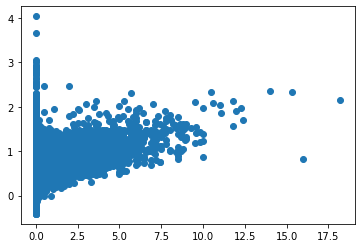

In [73]:
plt.scatter(y_test, predictions)

#drop zero snowfall measures which is probably the Junes, Julys and Augusts - 
#look at z score and eliminate anything more than 3 std ?

 This is a scatterplot with the plt.scatter() function, graphing the y_test data against the predictions from our training model. This is still not linear - the single dataset also was not. This, by the way, is what having zero snowfall days looks like along the X axis at 0.0

This information is not super useful by itself, but plotting it gives us a better idea of how accurate our predictions (and thus our model) is. The straighter the line, the better the model fit.

In [75]:
#accuracy score

print("Score:", lm.score(x_test, y_test))

Score: 0.20006900704046504


The accuracy of this model in predicting snowfall on any given day was just 20 % accuracy.  One fifth of the time, our model could accurately predict if it is going to snow on a particular day during the winter months in Sault Ste. Marie, Michigan.  

Before the zeroes were removed in our single dataset model it was accurate some 20% of the time, as well. Accuracy took a hit when the model was trying to predict if snow would fall in July, for instance. We had fed it misleading information at first. Removing the zeroes, or summer days, helped the model greatly. 

# K-Folds Cross Validation

K-Folds Cross Validation is one method I could try to improve the accuracy of the model - The idea behind k-folds cross validation is that you don’t want to rely on just one iteration of train-test-split, because it could be biased accidentally. So if one is good, isn’t more better? You can create as many iterations of training as you like, with the number of iterations indicated as k. 
​
If you break down k-fold categorization into its most basic components, here is what this function does:
​
Randomizes the data
Splits the data into groups (k #)
For each group, creates a test set and a training set, then fits a model and retains the accuracy score
Summarizes the model using each iteration’s accuracy score
Each separate group of data will the testing data once, and will be used as training data for the remainder of the iterations.

In [77]:
#K-fold

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [78]:
kfold = KFold(n_splits =3, shuffle = True, random_state= 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     3 ... 64365 64366 64367], test: [    2    10    11 ... 64343 64359 64362]
train: [    1     2     5 ... 64365 64366 64367], test: [    0     3     4 ... 64361 64363 64364]
train: [    0     2     3 ... 64362 64363 64364], test: [    1     5     9 ... 64365 64366 64367]


In [79]:
print(cross_val_score(lm, x,y, cv=5))

[0.20301172 0.20004393 0.20516632 0.20970501 0.18872883]


Accuracy is still in the 20s. Using kfold, four of the trained models could accurately predict snowfall just 20% of the time, with the fifth model trailing at 18%. 



### Random Forest

A decision tree regressor is a more powerful model compared to the linear regression seen above, and perhaps more applicable since that wasn't a linear distribution. The power of decision trees lies within its ability to identify nonlinear relationships within the data.

Other tree methods can introduce multicollinearity, meaning that it makes the trees too highly correlated. If we average things that are already a lot alike, we are not reducing variability and instead are introducing bias. But random forests randomizes everything equally and can thus reduce bias and prevent the tree outcomes from overlapping excessively. Random forests are also an awesome choice because there are no assumptions to test for, we don't need to scale any variables, and the model itself doesn't need a lot of playing around to get a good fit right off the bat.
However, decision trees are not without their downsides. While decision trees are great for complex datasets, they overfit the data and as a result do not generalize well. This would make is extremely difficult to model and predict something already unpredictable: the weather. 

In [81]:
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
#Create a Random Forest Regressor 

rf = RandomForestRegressor(n_estimators=100,max_depth= 8,) #accuracy might go down, but fewer errors .important to not overfit 

In [83]:
#Train the model on the weather data 

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8)

In [84]:
#Use this trained model to make predictions on the test data: will it snow? 

y_pred =  rf.predict(x_test)

When trying to evaluate the performance of a regression model (i.e. a model that predicts continuous values instead of categorical class labels), we can use different evaluation metrics such as mean absolute error, mean squared error, and R-squared.


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Print the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Absolute Error: 0.13529706448903486
Mean Squared Error: 0.21162885910145068
R-squared: 0.7742140145894791


### Interpretations of the Random Forest

The mean absolute error tells us, on average, how far off our predictions are from the true values. In our case, the mean absolute error is .13, which means that our predictions are, on average, .13 days away from the true values. Thirteen percent of a day is just over 3 hours.
The mean squared error tells us how much error there is in our predictions, on average. In our case, the mean squared error is .211, which means that our predictions are, on average, .21 days away from the true values. That's a fifth of a day, or 4.8 hours! 
The R-squared score tells us how well our predictions match the true values. In our case, the R-squared score is 0.77, which means that our predictions explain 77% of the variation in the true values. This is a good score, as it's over 70%.



In [86]:
print("Score:", rf.score(x_test, y_test))

Score: 0.7742140145894791


77 % is an acceptable score for this model. 

# The thing is: how do I predict if THIS YEAR, it will snow on Christmas???